<a href="https://colab.research.google.com/github/Srujanavalavala/fmml-lab-1/blob/main/FMML_Module4_Lab2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

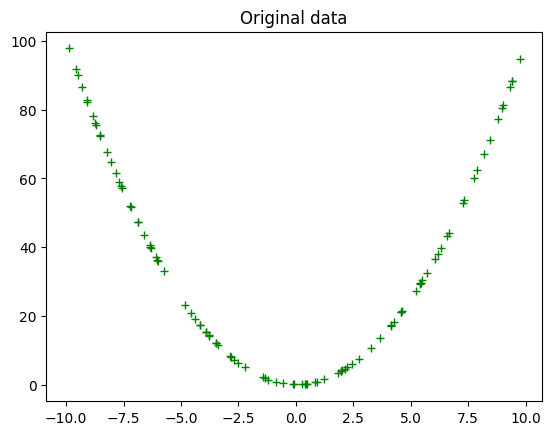

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [6]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


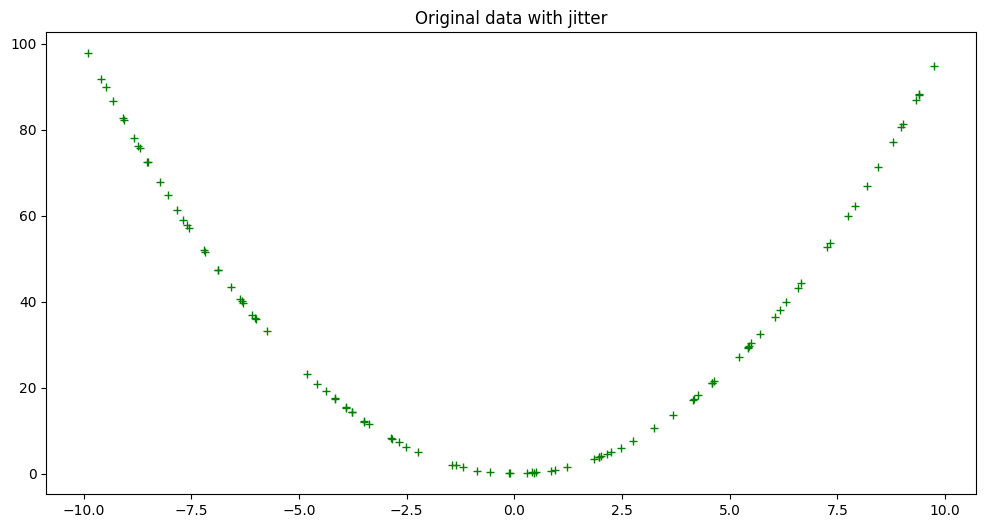

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [8]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

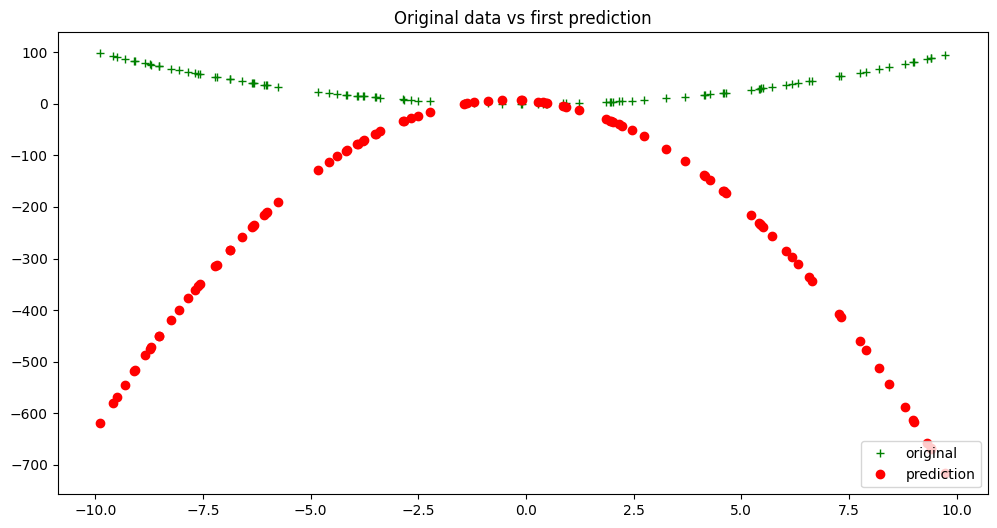

In [9]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [10]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

130693.35851515316

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [11]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [12]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.6763136065806203, -6.0203902001851555, 6.054726509900537)
Now have smaller model loss: 43779.12010025804 vs 130693.35851515316


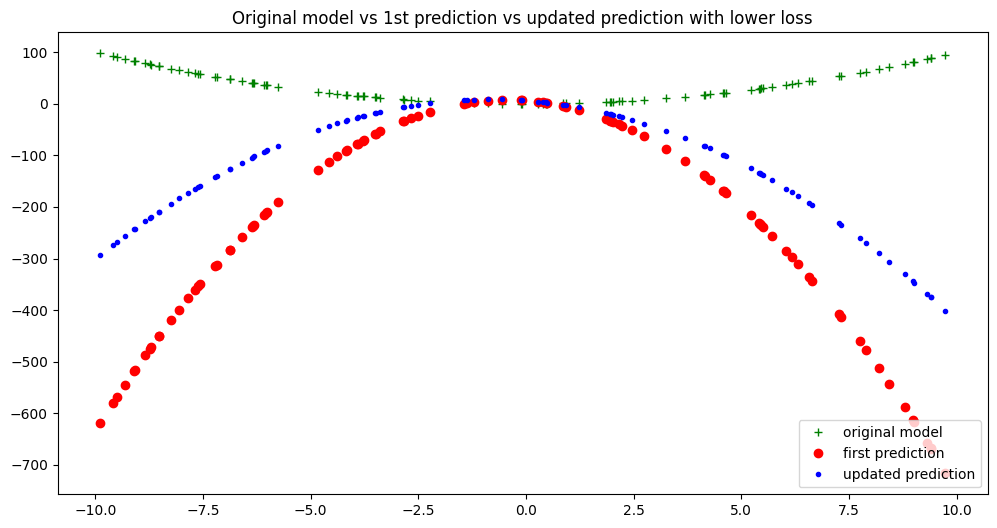

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [14]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [15]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [16]:
GD = gradient_descent(30000, 0.0003)


[11483.332358133406, 2022.4411928232385, 1230.0232443004024, 1123.9907338602347, 1073.9476926155696, 1030.0402571216566, 988.261093621161, 948.2261205939401, 909.8401558341902, 873.0334990437556, 837.7410208255133, 803.9004061283181, 771.4519145880811, 740.3382648068869, 710.5045324019454, 681.8980529608607, 654.4683290461529, 628.1669410306928, 602.9474616023239, 578.7653737863775, 555.5779923413072, 533.3443883886437, 512.0253171441898, 491.5831486228498, 471.9818011947356, 453.18667787522935, 435.16460523651193, 417.88377483268613, 401.31368703507127, 385.42509717850356, 370.189963923541, 355.5813997434011, 341.57362344820933, 328.1419146627203, 315.26257017714073, 302.9128620939761, 291.0709976970045, 279.71608097151307, 268.82807570786, 258.3877701232032, 248.37674293893724, 238.7773308539356, 229.57259735616594, 220.7463028176103, 212.28287581968365, 204.16738565852233, 196.38551598159287, 188.92353950907054, 181.7682937953545, 174.9071579879197, 168.3280305424688, 162.0193078550

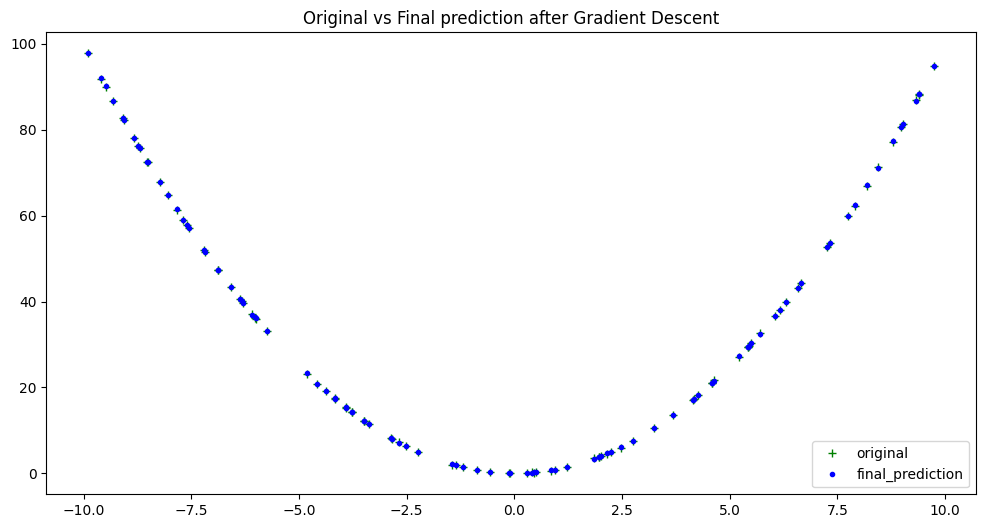

In [17]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [18]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999398813648452, 0.0007542792013856868, 0.0017082650011064507)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


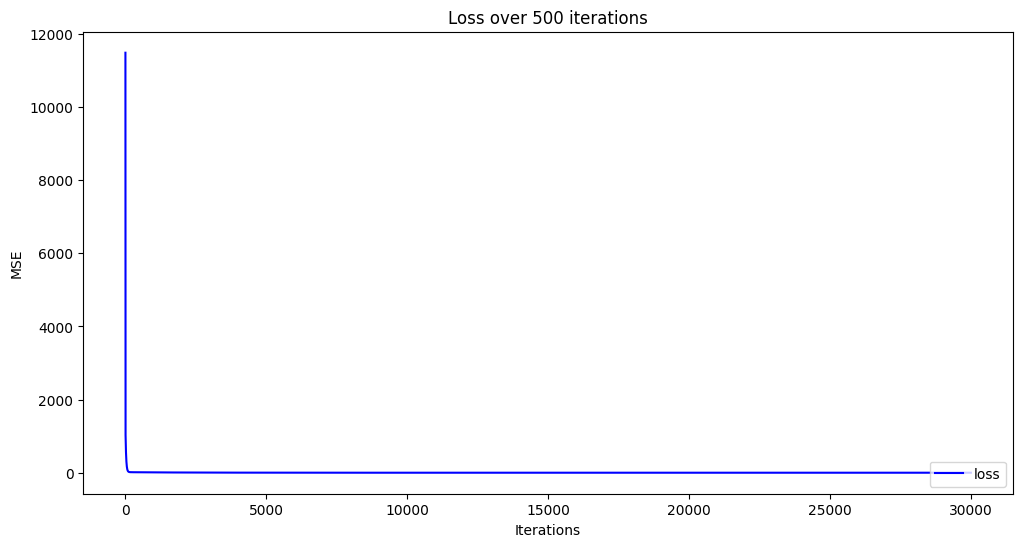

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



ANSWERS:

ANS 1:




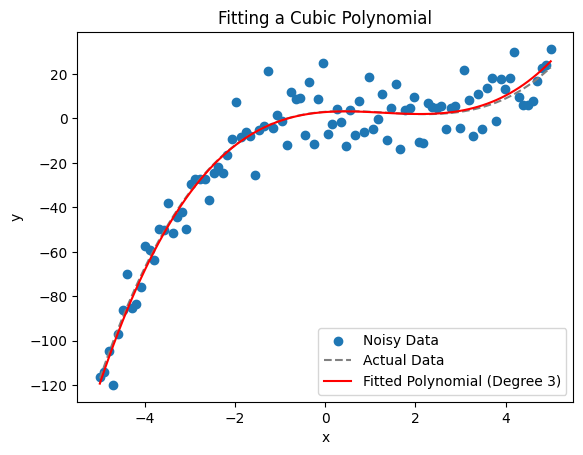

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(-5, 5, 100)
y_actual = 0.5 * x**3 - 2 * x**2 + 1.5 * x + 3
y_noisy = y_actual + np.random.normal(0, 10, size=len(x))

# Fit a cubic polynomial instead of x^2
degree = 3  # Degree of the polynomial
coefficients = np.polyfit(x, y_noisy, degree)

# Create a polynomial function using the new coefficients
poly_function = np.poly1d(coefficients)

# Generate y values using the new polynomial function
y_poly = poly_function(x)

# Plot the original data, the noisy data, and the fitted polynomial
plt.scatter(x, y_noisy, label='Noisy Data')
plt.plot(x, y_actual, label='Actual Data', linestyle='--', color='gray')
plt.plot(x, y_poly, label=f'Fitted Polynomial (Degree {degree})', color='red')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Cubic Polynomial')
plt.show()


ANS 2:


The learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of a loss function. Choosing an appropriate learning rate is crucial for the convergence of the optimization algorithm. Setting a learning rate that is too high can lead to overshooting the minimum, causing the algorithm to fail to converge. On the other hand, setting a learning rate that is too low can result in slow convergence or getting stuck in local minima.

If you increase the learning rate too much, the optimization algorithm might oscillate or diverge instead of converging. It might overshoot the minimum repeatedly, making the loss function increase rather than decrease.

If you decrease the learning rate, the optimization algorithm will take smaller steps at each iteration, which can lead to more precise convergence but may also result in slow convergence.

In practice, it's common to experiment with different learning rates to find the one that allows the algorithm to converge efficiently without oscillating or diverging. A common approach is to start with a moderate learning rate and adjust it based on the observed behavior during training.

To answer your specific question, using a very large learning rate can prevent convergence. The algorithm might take steps that are too large, missing the optimal values and failing to converge to the minimum of the loss function. It's essential to choose a learning rate that is appropriate for the specific optimization problem and dataset.



ANS 3:

When optimizing a degree 5 polynomial with 5 roots using an iterative optimization algorithm (such as gradient descent), the convergence behavior can indeed depend on the initializations. The phenomenon you're describing is related to the presence of multiple local minima, which can lead the optimization algorithm to converge to different solutions based on the starting point.

A degree 5 polynomial can have up to 5 roots (points where the polynomial equals zero). The convergence of the optimization algorithm is influenced by the interplay between the optimization landscape and the choice of initial values.

Here are some reasons why different initializations can lead to different converged values:

1. **Local Minima:** The polynomial may have multiple local minima. Depending on the initial values, the optimization algorithm may get stuck in one of these local minima, leading to different final solutions.

2. **Saddle Points:** There could be saddle points or regions with flat gradients in the optimization landscape. The algorithm might stall or slow down in these areas, and the choice of initialization can affect which branch the optimization takes.

3. **Numerical Stability:** Numerical issues, such as precision limitations in floating-point arithmetic, can also play a role. Different initializations might encounter different numerical challenges during optimization.

4. **Gradient Information:** The initial values determine the initial gradient information fed into the optimization algorithm. If the gradient points toward a specific direction, the algorithm is likely to follow that direction during the early iterations.

To observe this behavior, you can try running the optimization algorithm with different initializations and monitor the converged values. Visualizing the optimization landscape can also be helpful in understanding why certain initializations lead to specific solutions.

Keep in mind that this behavior is more likely to occur in higher-degree polynomials and complex non-convex optimization problems. Strategies such as using multiple random initializations and choosing the best result, or using more sophisticated optimization techniques, may be employed to mitigate the sensitivity to initial conditions.

ANS 4:


Certainly! To modify the optimization algorithm to find a maximum of a function instead of a minimum, you can simply negate the function you're trying to optimize. In other words, if you want to find the maximum of a function
f(x), you can minimize the negative of that function
−f(x). This way, the optimization algorithm will be seeking the minimum of the negated function, effectively finding the maximum of the original function.

Here's a basic example using gradient descent in Python. Assume you have a function f(x), and you want to find the maximum:

Optimal x for maximum: 1.9999999995925928
Maximum value: -0.0


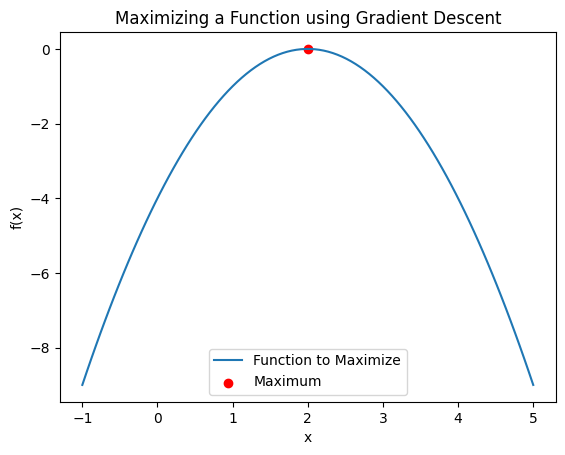

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function you want to maximize
def f(x):
    return -(x**2 - 4*x + 4)  # Example function (you can replace this with your own)

# Define the derivative of the function (gradient)
def df(x):
    return -2*x + 4  # Derivative of the example function

# Gradient Descent Optimization
def gradient_descent_maximize(initial_x, learning_rate, num_iterations):
    x = initial_x

    for _ in range(num_iterations):
        gradient = df(x)
        x = x + learning_rate * gradient

    return x

# Initial values
initial_x = 0.0
learning_rate = 0.1
num_iterations = 100

# Run the optimization
optimal_x = gradient_descent_maximize(initial_x, learning_rate, num_iterations)

# Print the result
print("Optimal x for maximum:", optimal_x)
print("Maximum value:", f(optimal_x))

# Plotting the function and the result
x_vals = np.linspace(-1, 5, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='Function to Maximize')
plt.scatter(optimal_x, f(optimal_x), color='red', label='Maximum')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Maximizing a Function using Gradient Descent')
plt.show()
